In [1]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib notebook
from LowLevelModules.PyAPT import APTMotor
from LowLevelModules.NIdaqAPD import APDCounter
from LowLevelModules.GeneralFunctions import *
import time

terminal = "/Dev1/PFI1"   # APD that has the HWP and polarizer in front

# initialize the HWP motor
hwp_collection = APTMotor(83853557, HWTYPE=31)
hwp_collection.setVelocityParameters(0, 25, 25)
print("Driver for the HWP ready to use")
pos_current = hwp_collection.getPos()
print('Current position:', np.round(pos_current, 2))

Driver for the HWP ready to use
Current position: 196.5


<IPython.core.display.Javascript object>


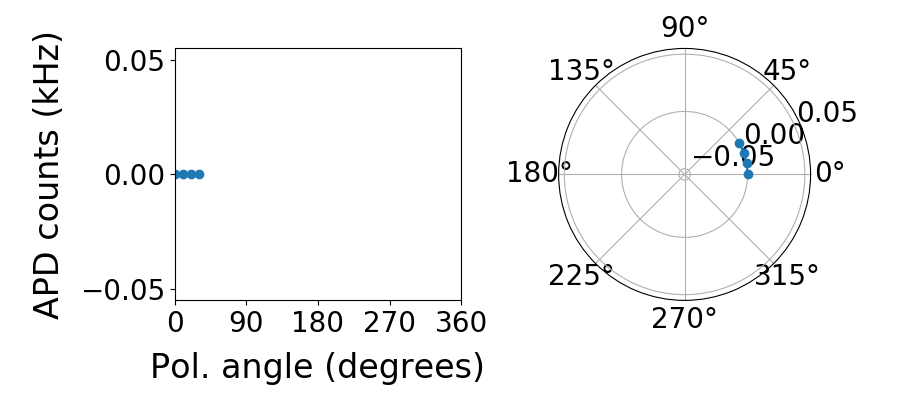

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\nidaqmx\task.py:463: ResourceWarning: Attempted to close NI-DAQmx task of name "Pol counts" but task was already closed.
  'already closed.'.format(self._saved_name), DaqResourceWarning)


In [2]:
"""#######################################   USER INPUT   #################################################"""
ang_step = 10
collection_time = 1   #seconds
save_data = False
#calibration 3/7/19. Collection polarizer offset by 21.5 degrees, no pellicule in path
offset = 21.5
"""#########################################################################################################"""
  
lp = LivePlot(2, 9, 4, 'o', 'Pol. angle (degrees)', 'APD counts (kHz)')
lp.ax1.set_xlim([0, 360])
lp.ax1.set_xticks(np.arange(0,370,90))

pos, cts = [], []
for p in range(0, 360, ang_step):
    try:
        # move HWP to new position
        hwp_collection.mAbs(p/2 + offset)
        # collect the APD count rate
        APD1 = APDCounter(terminal, task_name='Pol counts')
        APD1.start()
        time.sleep(collection_time)
        APD_cts = APD1.read() / collection_time / 1000
        APD1.close()
        # get the new data and update the plot
        pos.append(p)
        cts.append(APD_cts)
        lp.plot_live(pos, cts)
    except KeyboardInterrupt:
        # press the stop button to trigger this
        APD1.close()
        break

if save_data:
    data_type = 'PLvsTheta'
    data_header = "HWP angle (degrees)     APD counts (kHz)"
    data_array = np.array([pos, cts]).T
    data_save(data_array, lp.fig, data_type, data_header)


In [52]:
go_to_position = 100
hwp_collection.mAbs(go_to_position)
pos_current = hwp_collection.getPos()
print('Current position:', np.round(pos_current, 2))

Current position: 100.0


In [34]:
# Absorption polarization control

In [10]:
# initialize the HWP motor
hwp_absorption = APTMotor(83857433, HWTYPE=31)
hwp_absorption.setVelocityParameters(0, 25, 25)
print("Driver for the HWP ready to use")
pos_current = hwp_absorption.getPos()
print('Current position:', np.round(pos_current, 2))

Driver for the HWP ready to use
Current position: 0.0


In [60]:
go_to_position = 0
hwp_absorption.mAbs(go_to_position/2)
pos_current = hwp_absorption.getPos()
print('Current position:', np.round(pos_current*2, 2))

Current position: 720.0


In [3]:
# run this to shut down the connection with the drivers
#hwp_absorption.cleanUpAPT()
hwp_collection.cleanUpAPT()